In [3]:
import numpy as np
import os
from PIL import Image
in_size=784
h1_size=64
h2_size=32
out_size=10

lr=0.01
epoch=20
batch_size =64
losses = []

In [4]:
def load_dataset(path):
    X, y = [], []
    for label in map(str, range(10)):
        folder = os.path.join(path, label)
        if not os.path.exists(folder): continue
        for fname in os.listdir(folder):
            img_path = os.path.join(folder, fname)
            img = Image.open(img_path).convert("L").resize((28, 28))
            arr = np.array(img).astype(np.float32) / 255.0
            X.append(arr.flatten())
            y.append(int(label))
    return np.array(X), np.array(y).reshape(-1, 1)

train_path = "D:/MNIST/Reduced_MNIST_Dataset/training_data"
test_path = "D:/MNIST/Reduced_MNIST_Dataset/test_data"
x_train, y_train = load_dataset(train_path)
x_test, y_test = load_dataset(test_path)

print(f"Loaded training set: {x_train.shape}, {y_train.shape}")
print(f"Loaded test set: {x_test.shape}, {y_test.shape}")

Loaded training set: (10000, 784), (10000, 1)
Loaded test set: (2000, 784), (2000, 1)


In [5]:
def xav_weights(size):
    return np.random.randn(*size) * np.sqrt(2.0 / size[0])

w1=xav_weights((in_size, h1_size))
b1 = np.zeros(h1_size)
w2 = xav_weights((h1_size, h2_size))
b2 = np.zeros(h2_size)
w3 = xav_weights((h2_size, out_size))
b3 = np.zeros(out_size)

def relu(x):
    return np.maximum(0, x)

#def softmax(x):
#    exps=np.exp(x - np.max(x))
#    return exps / np.sum(exps, axis=1, keepdims=True)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))  #to stabilize
    return exps / np.sum(exps, axis=1, keepdims=True)

x= np.random.randn(1, in_size) 


def cross_en(pred,target):
    eps = 1e-9
    #return -np.log(pred[0, target[0,0]])
    return -np.log(pred[range(len(target)), target.flatten()] + eps)

def forward(x):
    z1 = x @ w1 + b1
    a1 = relu(z1)
    z2 = a1 @ w2 + b2
    a2 = relu(z2)
    z3 = a2 @ w3 + b3
    a3 = softmax(z3)
    return x, z1, a1, z2, a2, z3, a3

def evaluate(x_eval, y_eval):
    correct = 0
    total_loss = 0
    for i in range(0, len(x_eval), batch_size):
        xb = x_eval[i:i+batch_size]
        yb = y_eval[i:i+batch_size]

        _, _, _, _, _, _, a3 = forward(xb)
        predictions = np.argmax(a3, axis=1)
        correct += np.sum(predictions == yb.flatten())
        total_loss += np.sum(loss)

    accuracy = correct / len(x_eval)
    avg_loss = total_loss / len(x_eval)
    print(f"Evaluation — Accuracy: {accuracy:.4f}, Avg Loss: {avg_loss:.4f}")
    return accuracy, avg_loss

In [6]:
for e in range(epoch):
    perm = np.random.permutation(len(x_train))
    x_train_shuffled = x_train[perm]
    y_train_shuffled = y_train[perm]

    tot_loss = 0
    correct = 0

    for i in range(0, len(x_train), batch_size):
        xb = x_train_shuffled[i:i+batch_size]
        yb = y_train_shuffled[i:i+batch_size]

        x0, z1, a1, z2, a2, z3, a3 = forward(xb)

        predictions = np.argmax(a3, axis=1)
        correct += np.sum(predictions == yb.flatten())
        loss = cross_en(a3, yb)
        tot_loss += np.sum(loss)

        dz3 = a3.copy()
        dz3[range(len(yb)), yb.flatten()] -= 1
        dz3 /= len(yb)

        dw3 = a2.T @ dz3
        db3 = np.sum(dz3, axis=0)

        da2 = dz3 @ w3.T
        dz2 = da2 * (z2 > 0)

        dw2 = a1.T @ dz2
        db2 = np.sum(dz2, axis=0)

        da1 = dz2 @ w2.T
        dz1 = da1 * (z1 > 0)

        dw1 = xb.T @ dz1
        db1 = np.sum(dz1, axis=0)

        w3 -= lr * dw3
        b3 -= lr * db3
        w2 -= lr * dw2
        b2 -= lr * db2
        w1 -= lr * dw1
        b1 -= lr * db1

        avg_loss = np.mean(loss)
        losses.append(avg_loss)
    print(f"Epoch {e+1}, Accuracy: {correct / len(x_train):.4f}, Total Loss: {tot_loss:.4f}")
    evaluate(x_test, y_test)

Epoch 1, Accuracy: 0.5095, Total Loss: 16749.8798
Evaluation — Accuracy: 0.8155, Avg Loss: 0.2572
Epoch 2, Accuracy: 0.8255, Total Loss: 7546.4090
Evaluation — Accuracy: 0.8715, Avg Loss: 0.1363
Epoch 3, Accuracy: 0.8630, Total Loss: 5172.0152
Evaluation — Accuracy: 0.8905, Avg Loss: 0.2061
Epoch 4, Accuracy: 0.8824, Total Loss: 4297.6374
Evaluation — Accuracy: 0.8980, Avg Loss: 0.2426
Epoch 5, Accuracy: 0.8935, Total Loss: 3828.8366
Evaluation — Accuracy: 0.9065, Avg Loss: 0.0913
Epoch 6, Accuracy: 0.9008, Total Loss: 3524.0364
Evaluation — Accuracy: 0.9090, Avg Loss: 0.1406
Epoch 7, Accuracy: 0.9084, Total Loss: 3297.0631
Evaluation — Accuracy: 0.9250, Avg Loss: 0.0690
Epoch 8, Accuracy: 0.9130, Total Loss: 3123.7163
Evaluation — Accuracy: 0.9225, Avg Loss: 0.0847
Epoch 9, Accuracy: 0.9147, Total Loss: 2988.6865
Evaluation — Accuracy: 0.9275, Avg Loss: 0.0141
Epoch 10, Accuracy: 0.9196, Total Loss: 2867.0367
Evaluation — Accuracy: 0.9250, Avg Loss: 0.0308
Epoch 11, Accuracy: 0.9215, 

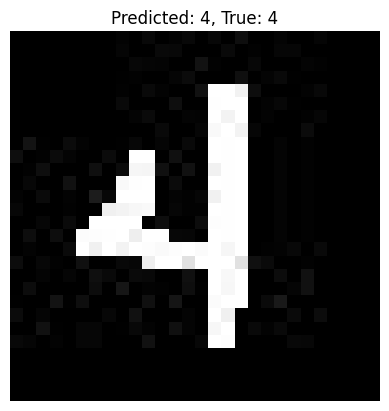

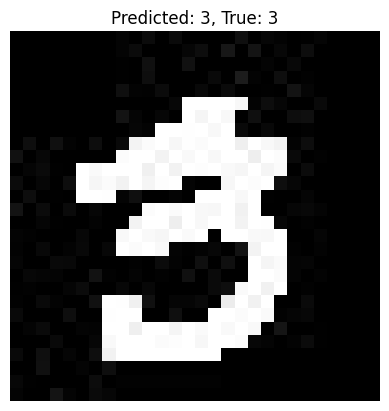

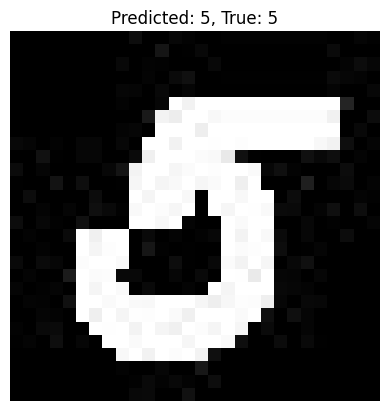

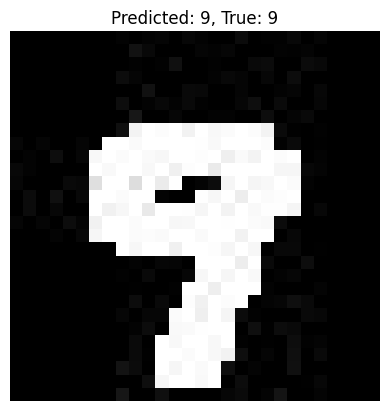

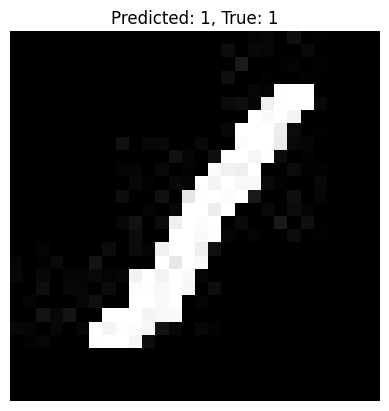

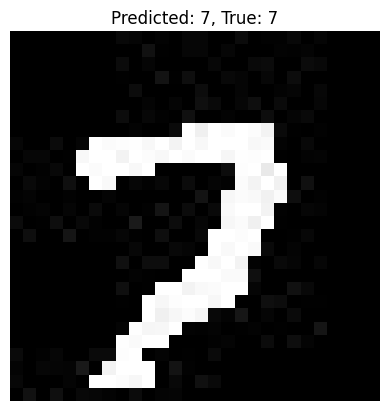

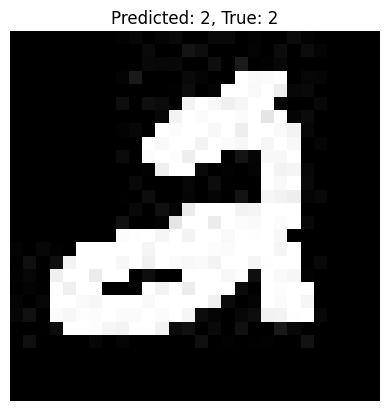

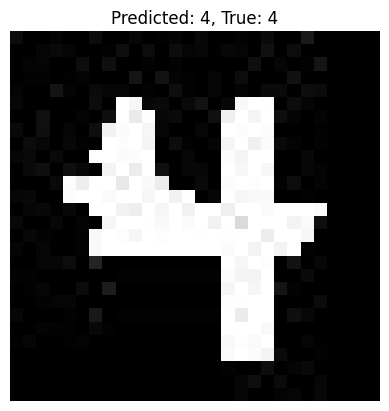

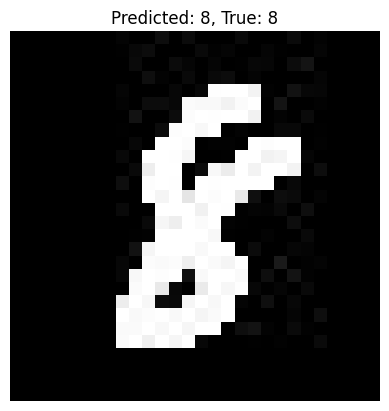

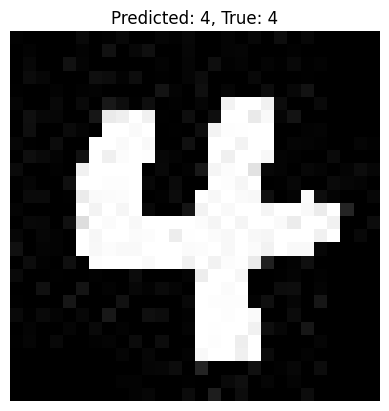

In [7]:
import matplotlib.pyplot as plt

# Pick a few test images to visualize
num_samples = 10
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)

for idx in sample_indices:
    image = x_test[idx].reshape(28, 28)
    true_label = y_test[idx][0]

    # Forward pass for a single image
    _, _, _, _, _, _, output = forward(x_test[idx:idx+1])
    pred_label = np.argmax(output)

    # Plot the image
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {pred_label}, True: {true_label}")
    plt.axis('off')
    plt.show()